# Tutorial
Let's start your survay of dielectric properties of various materials. The first thing you must do is to create a RiiDataFrame oject. The first trial will take a few minutes, because experimental data will be pulled down from Polyanskiy's [refractiveindex.info database](https://github.com/polyanskiy/refractiveindex.info-database) and equi-spaced grid data will be obtained by interpolating the experimental data.

In [1]:
import riip
ri = riip.RiiDataFrame()

Catalog file not found.
Cloning Repository...
Done.
Creating catalog file...
Done.
Creating raw data file...
Done.
Updating grid data file...
Done.


You can use some helper methods for your survay.


## __search__
```
search(name: str) -> DataFrame
```
This method searches data that contain given __name__ of material and return a catalog for them.

In [2]:
ri.search("NaCl")

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
182,NaCl,,Li,1,f,0.20,30.0000
183,NaCl,,Querry,0,nk,0.22,166.6667


In [3]:
ri.search("sodium").head(5) # upper or lower case is not significant

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
127,NaBr,,Li,1,f,0.210,34.0000
182,NaCl,,Li,1,f,0.200,30.0000
183,NaCl,,Querry,0,nk,0.220,166.6667
229,NaF,,Li,1,f,0.150,17.0000
295,NaI,,Jellison,1,f,0.436,0.6330


## __select__
```
select(condition: str) -> DataFrame
```
This method make a query with the given __condition__ and return a catalog.  For example, if you want to find a material whose refractive index n is in a range 2.5 < n < 3 somewhere in the wavelength range 0.4&mu;m < wl < 0.8&mu;m:

In [4]:
ri.select("2.5 < n < 3 and 0.4 < wl < 0.8").head(5)

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
23,Al,Experimental data,Mathewson,0,nk,0.495940,1.771200
118,Bi,Experimental data,Hagemann,0,nk,0.000002,6.199000
129,TlBr,,Palik,1,f,0.570000,39.400000
135,C,Amorphous thin film,Larruquert,0,nk,0.019656,10.079189
137,C,Graphite,Djurisic-o,0,nk,0.030996,10.332000


## __show__
```
show(ids: int | Sequence[int]) -> DataFrame
```
This method shows the catalog for given __ids__.

In [5]:
ri.show([23, 118])

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
23,Al,Experimental data,Mathewson,0,nk,0.495940,1.7712
118,Bi,Experimental data,Hagemann,0,nk,0.000002,6.1990


## __read__
```
read(id, as_dict=False)
```
This method returns the contants of a page associated with the id.

In [6]:
print(ri.read(23))

# this file is part of refractiveindex.info database
# refractiveindex.info database is in the public domain
# copyright and related rights waived via CC0 1.0

REFERENCES: "A. G. Mathewson and H. P. Myers. Absolute values of the optical constants of some pure metals, <a href=\"https://doi.org/10.1088/0031-8949/4/6/009\"><i>Phys. Scr.</i> <b>4</b>, 291-292 (1971)</a>"
COMMENTS: "298 K (24.85 °C)"
DATA:
  - type: tabulated nk
    data: |
        0.49594 0.77909 5.84012
        0.50606 0.81783 5.93033
        0.51660 0.85227 6.10134
        0.52759 0.89107 6.22848
        0.53906 0.94408 6.35541
        0.55104 1.00461 6.51991
        0.56356 1.06864 6.64394
        0.57667 1.14503 6.76839
        0.59040 1.21981 6.92733
        0.60480 1.30548 7.08550
        0.61992 1.40111 7.20855
        0.63582 1.50675 7.36684
        0.65255 1.62810 7.49338
        0.67018 1.77579 7.65855
        0.68880 1.94186 7.82757
        0.70848 2.13059 8.00246
        0.72932 2.33676 8.15233
        0.75142 

## __references__
```
references(id: int)
```
This method returns the REFERENCES of a page associated with the id.

In [7]:
ri.references(23)

## __plot__
```
plot(id: int, comp: str = "n", fmt1: str = "-", fmt2: str = "--", **kwargs)
```
* id: ID number
* comp: 'n', 'k' or 'eps'
* fmt1 (Union[str, None]): Plot format for n and Re(eps), such as "-", "--", ":", etc.
* fmt2 (Union[str, None]): Plot format for k and Im(eps).

This plot uses 200 data points only. If you want more fine plots, use __plot__ method of __RiiMaterial__ explained below. 

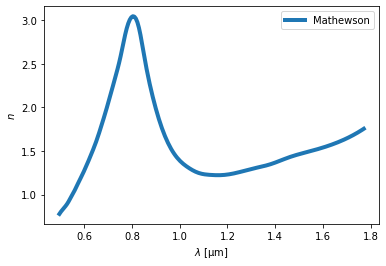

In [8]:
ri.plot(23, "n")

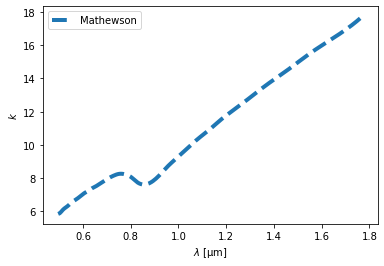

In [9]:
ri.plot(23, "k")

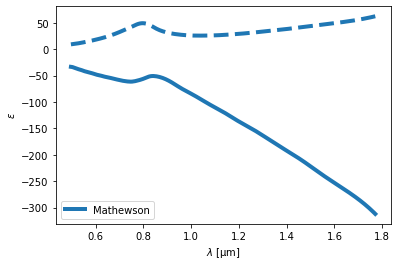

In [10]:
ri.plot(23, "eps")

## __material__
```
material(params: dict) -> Material
```
This method returns __Material__-class instance for given parameter dict __params__.

__params__ can includes the following parameters,
* 'id': ID number. (int)
* 'book': book value in catalog of RiiDataFrame. (str)
* 'page': page value in catalog of RiiDataFrame. (str)
* 'RI': Constant refractive index. (complex)
* 'e': Constant permittivity. (complex)
* 'bound_check': True if bound check should be done. Defaults to True. (bool)
* 'im_factor': A magnification factor multiplied to the imaginary part of permittivity. Defaults to 1.0. (float)


In [11]:
Al = ri.material({'id': 23})
type(Al)

riip.material.Material

Using the created Material object, you can get refractive index n, extinction coefficient k, and dielectric function eps, and plot them.
### __Material.n__
```
n(wl: ArrayLike) -> ArrayLike
```

In [12]:
Al.n(1.0)  # refractive index at wavelength = 1.0μm

1.3899282542977849

### __Material.k__
```
k(wl: ArrayLikey) -> ArrayLike
```

In [13]:
Al.k(1.0)  # extinction coeficient at wavelength = 1.0μm

9.29612443028388

### __Material.eps__
```
eps(wl: ArrayLike) -> ArrayLike
```

In [14]:
Al.eps(1.0)  # permittivity at wavelength = 1.0μm

(-84.48602887122551+25.84189200223893j)

Wavelengths __wl__ can be a single complex value or an array of complex values.

In [15]:
import numpy as np
wls = np.linspace(0.5, 1.6)
Al.eps(wls)

array([ -33.67756077 +9.32237639j,  -37.37099091+10.76642941j,
        -40.48007076+12.53258237j,  -43.40382102+14.56069085j,
        -46.40772695+16.83596896j,  -49.24177749+19.32450842j,
        -51.87203854+22.05584598j,  -53.97258292+25.08305181j,
        -56.53596324+28.78875995j,  -58.88350388+32.86521087j,
        -60.71385987+37.1741283j ,  -61.57228729+41.55945809j,
        -60.12911702+46.32015037j,  -57.30534918+49.05004179j,
        -53.3025562 +47.83949057j,  -50.89837648+43.14679491j,
        -51.84632276+37.58238573j,  -54.80097964+33.65174018j,
        -59.37975454+30.91365925j,  -65.24676207+28.98346003j,
        -71.68601924+27.6368441j ,  -77.56359077+26.62565318j,
        -82.98698417+25.95615477j,  -88.58984464+25.65838341j,
        -94.49488142+25.59806765j, -100.57222728+25.6620527j ,
       -106.3896107 +25.86504049j, -111.80012917+26.22868897j,
       -117.37650002+26.73629885j, -123.56896814+27.35630896j,
       -129.97026563+28.05783746j, -135.99407702+28.816


### __Material.plot__
```
plot(wls: np.ndarray, comp: str = "n", fmt1: str = "-", fmt2: str = "--", **kwargs)
```
* wls: Wavelength [μm].
* comp: 'n', 'k' or 'eps'
* fmt1 (Union[str, None]): Plot format for n and Re(eps), such as "-", "--", ":", etc.
* fmt2 (Union[str, None]): Plot format for k and Im(eps).

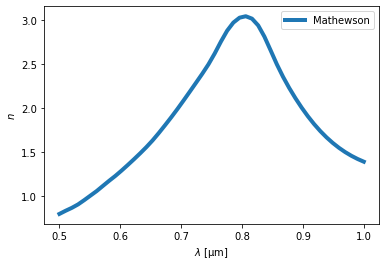

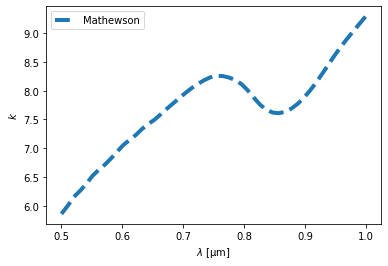

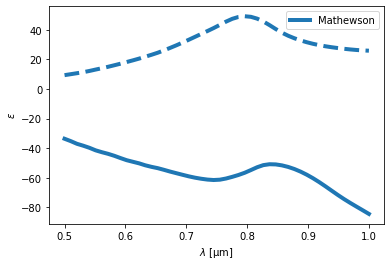

In [16]:
import matplotlib.pyplot as plt
wls = np.linspace(0.5, 1.0)
Al.plot(wls, "n")
plt.show()
Al.plot(wls, "k")
plt.show()
Al.plot(wls, "eps")
plt.show()
